In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump
from joblib import load
from train import train_rbf_simple
from utils import generate_migrants
from utils import calculate_thresholds_basic
from migrant_detection import predict_migrant_linear
from migrant_detection import adaptive_threshold
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Test basic migrant dection on linearly seperable dataset with linear SVM

[False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True]


/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/.venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/.venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


/tmp/ipykernel_179163/530676623.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(support[:,0], support[:,1], c='red', cmap='viridis')


debug


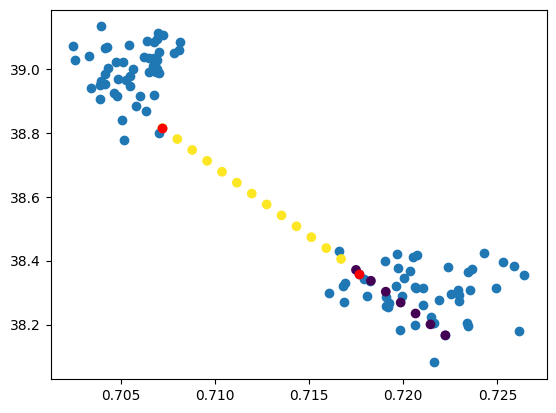

In [2]:
data = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/input/testdata.pkl")
clf = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/simple_lin.pkl")


# Generate 10 migrants and a datapoint for each year since the migration
n=10
migrants = generate_migrants(data, n)

migrant = migrants[0]
# Extract the first two dimensions for plotting
x = migrant[:, 0].flatten()
y = migrant[:, 1].flatten()
cluster_0 = data[data['cluster'] == 0].drop(columns=['cluster'])
cluster_1 = data[data['cluster'] == 1].drop(columns=['cluster'])
x1 = data['87Sr/86Sr']
y1 = data['208Pb/204Pb']
plt.scatter(x1,y1)

# Generate basic threshold for distance to hyperplane(t1) and distance to cluster connecting vector(t2)
t1, t2 = calculate_thresholds_basic(data, clf)

# Drop labels
data = data.drop(columns=['cluster'])

predictions_migrant = predict_migrant_linear(migrant, data, clf, t1, t2)
print(predictions_migrant)

# Plot detected migrants
plt.scatter(x[0:20], y[0:20], c=predictions_migrant, cmap='viridis')

# Plot support vectors
support = np.array([[x[0],x[1], 3] for x in clf.support_vectors_]) #np.append(np.array(clf.support_vectors_),[[3],[3]],axis=1)
plt.scatter(support[:,0], support[:,1], c='red', cmap='viridis')
print('debug')
#plot.scatter

[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False]


/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/.venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/.venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


/tmp/ipykernel_179163/1057519131.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(support[:,0], support[:,1], c='red', cmap='viridis')


debug


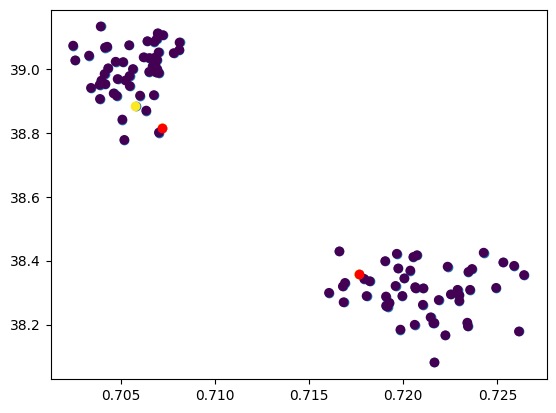

In [3]:
# Test Migrant prediction on cluster
data = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/input/testdata.pkl")
clf = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/simple_lin.pkl")

data_no_cluster = data.drop(columns=['cluster'])

# Extract the first two dimensions for plotting
x1 = data['87Sr/86Sr']
y1 = data['208Pb/204Pb']
plt.scatter(x1,y1)

# Generate basic threshold for distance to hyperplane(t1) and distance to cluster connecting vector(t2)
t1, t2 = calculate_thresholds_basic(data, clf)

# Drop labels
data = data.drop(columns=['cluster'])

predictions_migrant = predict_migrant_linear(data_no_cluster.values, data, clf, t1, t2)
print(predictions_migrant)

# Plot detected migrants
plt.scatter(x1, y1, c=predictions_migrant, cmap='viridis')

# Plot support vectors
support = np.array([[x[0],x[1], 3] for x in clf.support_vectors_]) #np.append(np.array(clf.support_vectors_),[[3],[3]],axis=1)
plt.scatter(support[:,0], support[:,1], c='red', cmap='viridis')
print('debug')
#plot.scatter


Test Migrant Generation from generated Data

Text(0.5, 0, '87Sr/86Sr')

Text(0, 0.5, '208Pb/204Pb')

array([[[ 0.71749518, 38.31677901, 15.64205808, 18.47235418,
          2.4522811 ,  1.16851337],
        [ 0.71693812, 38.34441736, 15.65009371, 18.49933931,
          2.45364988,  1.17041037],
        [ 0.71638106, 38.37205572, 15.65812933, 18.52632444,
          2.45501867,  1.17230737],
        [ 0.715824  , 38.39969407, 15.66616495, 18.55330958,
          2.45638745,  1.17420436],
        [ 0.71526693, 38.42733242, 15.67420058, 18.58029471,
          2.45775623,  1.17610136],
        [ 0.71470987, 38.45497078, 15.6822362 , 18.60727984,
          2.45912501,  1.17799835],
        [ 0.71415281, 38.48260913, 15.69027183, 18.63426497,
          2.46049379,  1.17989535],
        [ 0.71359575, 38.51024749, 15.69830745, 18.66125011,
          2.46186257,  1.18179235],
        [ 0.71303869, 38.53788584, 15.70634307, 18.68823524,
          2.46323135,  1.18368934],
        [ 0.71248163, 38.56552419, 15.7143787 , 18.71522037,
          2.46460013,  1.18558634],
        [ 0.71192456, 38.59316

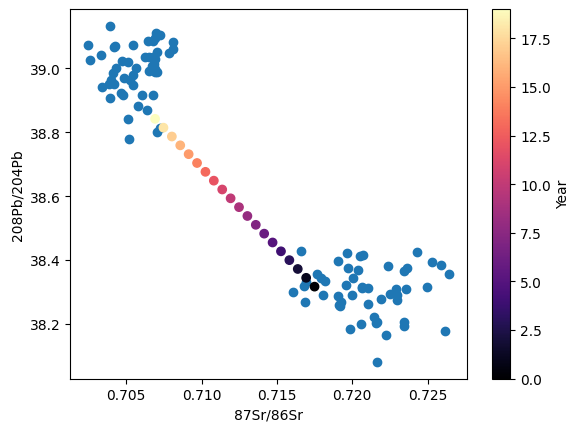

In [10]:
data = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/input/testdata.pkl")
n=1
migrants = generate_migrants(data, n)
# Extract the first two dimensions for plotting
x = migrants[:, :, 0].flatten()
y = migrants[:, :, 1].flatten()
cluster_0 = data[data['cluster'] == 0].drop(columns=['cluster'])
cluster_1 = data[data['cluster'] == 1].drop(columns=['cluster'])

x1 = data['87Sr/86Sr']
y1 = data['208Pb/204Pb']
plt.scatter(x1,y1)
#sns.kdeplot(data=cluster_0, x='87Sr/86Sr', y='208Pb/204Pb')
#sns.kdeplot(data=cluster_1, x='87Sr/86Sr', y='208Pb/204Pb')
# Create an array of colors based on the year (from 0 to 19)
colors = np.tile(np.arange(20), n)

# Create a scatter plot
plt.scatter(x, y, c=colors, cmap='magma')
# Plot single migrant
#plt.scatter(x[10], y[10], c='red')
# Add labels and title
plt.xlabel('87Sr/86Sr')
plt.ylabel('208Pb/204Pb')
#plt.title('Process if linear Mixing after Migration')

# Show colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Year')

# Display the plot
#plt.show()
plt.savefig('linear_mixing_process.svg')
migrants

''

            Seed  End_Year  Accuracy   Recall  Precision     Score
Start_Year                                                        
1           49.5       4.0  0.748650  0.51730   0.962360  0.671216
5           49.5       8.0  0.988800  0.99760   0.980345  0.988890
9           49.5      12.0  0.990000  1.00000   0.980392  0.990099
13          49.5      16.0  0.989950  0.99990   0.980390  0.990049
16          49.5      20.0  0.843956  0.73512   0.978646  0.839077
      End_Year  Accuracy    Recall  Precision     Score
Seed                                                   
49.5      12.0  0.912271  0.849984   0.976427  0.895866
            Seed  End_Year  Accuracy   Recall  Precision     Score
Start_Year                                                        
1           49.5       4.0  0.774150  0.65830   0.856128  0.743406
5           49.5       8.0  0.944700  0.99940   0.900846  0.947564
9           49.5      12.0  0.945000  1.00000   0.900901  0.947867
13          49.5      16.0  

<Axes: xlabel='Start_Year', ylabel='Recall'>

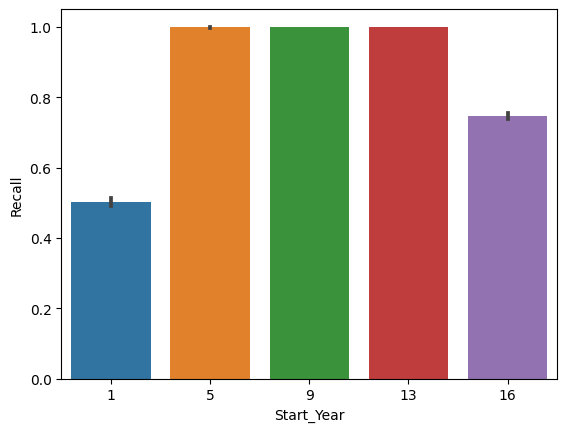

In [30]:
''# Look at Experiment 1 Results groups of years
from pprint import pprint
from joblib import load
import seaborn as sns
import numpy as np
import pandas as pd

results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_seeds.pkl') #  columns=['Seed', 'Year', 'Accuracy', 'Recall', 'Precision', 'Score'])
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_real_gaussian_C1.pkl')
print(results.copy().groupby(['Start_Year']).mean())
print(results.copy().groupby(['Start_Year']).mean().groupby(['Seed']).mean())
results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_seeds_multiplier_1_5.pkl') #  columns=['Seed', 'Year', 'Accuracy', 'Recall', 'Precision', 'Score'])
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_real_gaussian_C1.pkl')
print(results.copy().groupby(['Start_Year']).mean())
print(results.copy().groupby(['Start_Year']).mean().groupby(['Seed']).mean())
results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_random_migrants.pkl')
print(results.copy().groupby(['Start_Year']).mean())
print(results.copy().groupby(['Start_Year']).mean().groupby(['Seed']).mean())

sns.barplot(results, x='Start_Year', y='Recall')
plt.show()

''

      Accuracy    Recall  Precision     Score
Seed                                         
49.5  0.889498  0.834495   0.944266  0.882276


<Axes: xlabel='Multiplier'>

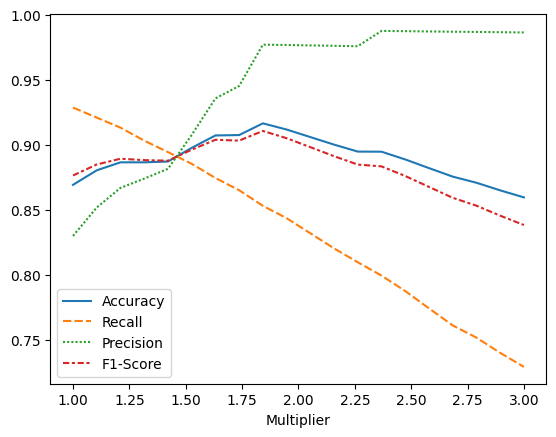

In [29]:
''# Look at preparatory experiments for threshold calculations
from pprint import pprint
from joblib import load
import seaborn as sns
import numpy as np
import pandas as pd

#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/preparatory_experiment_threshold_3.pkl') #  columns=['Seed', 'Year', 'Accuracy', 'Recall', 'Precision', 'Score'])
results = load ("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/preparatory_experiment_threshold_3_multiplier_fine_tuning.pkl")
print(results.copy().groupby(['Multiplier']).mean().groupby(['Seed']).mean())
#results = load ("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/preparatory_experiment_threshold_3_multiplier_fine_tuning_C1.pkl")
#print(results.copy().groupby(['Multiplier']).mean().groupby(['Seed']).mean())
#results = load ("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/preparatory_experiment_threshold_3_multiplier_fine_tuning_C0_01.pkl")
#print(results.copy().groupby(['Multiplier']).mean().groupby(['Seed']).mean())
results = results.drop(columns=['Seed'])
results = results.rename(columns={"Score": "F1-Score"})
results = results.groupby(['Multiplier']).mean()
#print('accuracy, recall, precision, score')
#pprint(results)
#print(len(results))
#df = pd.DataFrame(results, columns=['accuracy', 'recall', 'precision', 'score'])
#fig, ax = plt.subplots()

#sns.scatterplot(results['Score'],ax=ax)
#ax.set_ylim(0, 1)


#sns.barplot(results, x='Multiplier', y='Score')

#sns.lineplot(results, x='Multiplier', y='Score')
#sns.lineplot(results, x='Multiplier', y='Recall')
sns.lineplot(results)
plt.show()

689312.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


0.07027433241731423

0.7667495275100581

-0.24139142336728484

3.972738854861295

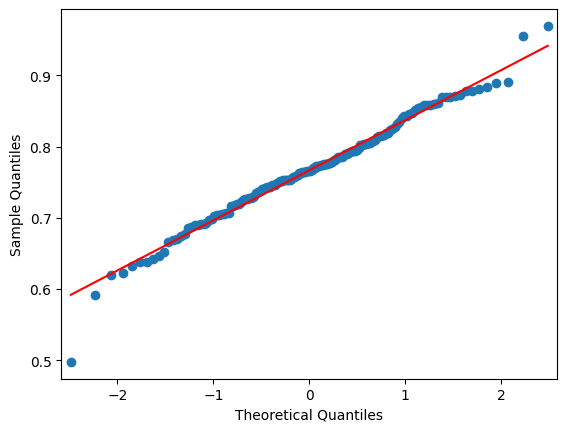

'\ng = sns.displot(\n    data, \n    x=cols[0],\n    kind=\'kde\',\n    facet_kws=dict(sharey=False, sharex=False)\n)\n# extract and flatten the axes from the figure\naxes = g.axes.flatten()\n\n# iterate through each axes\nfor ax in axes:\n    # extract the species name\n    #spec = ax.get_title().split(\' = \')[1]\n    \n    # select the data for the species\n    #data = pen_g.loc[spec, :]\n    \n    # print data as needed or comment out\n    #print(data)\n    \n    # plot the lines\n    ax.axvline(x=mean, c=\'k\', ls=\'-\', lw=1.8)\n    ax.axvline(x=mean + std, c=\'yellow\', ls=\'--\', lw=1.8)\n    ax.axvline(x=mean - std, c=\'yellow\', ls=\'--\', lw=1.8)\n\n    ax.axvline(x=mean + 2*std, c=\'orange\', ls=\'--\', lw=1.8)\n    ax.axvline(x=mean - 2*std, c=\'orange\', ls=\'--\', lw=1.8)\n\n    ax.axvline(x=mean + 3*std, c=\'red\', ls=\'--\', lw=1.8)\n    ax.axvline(x=mean - 3*std, c=\'red\', ls=\'--\', lw=1.8)\n\nplt.savefig("Distances_ccv_kde_plot_quantiles_c1.svg")\n'

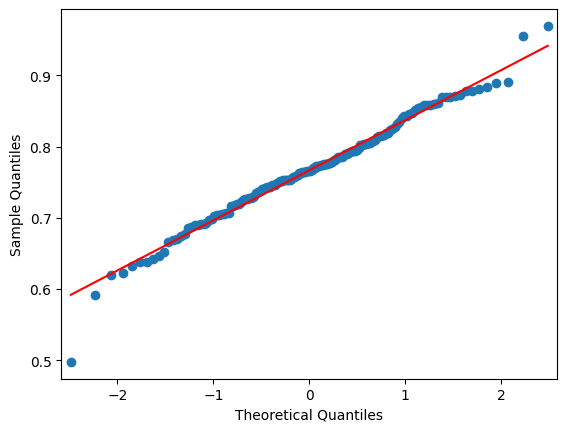

In [45]:
# Visualize the distance distributions
%pip install statsmodels
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
  
#data = np.array(load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/Plots/distances_cluster_0.pkl'))
data = np.array(load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/Plots/distances_cluster_1.pkl'))
#data = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/Plots/distances_ccv_[0.89797944 0.18919623 0.08775629 0.19234022 0.27453981 0.14073406].pkl')
#data = np.array(load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/Plots/distances_ccv_[0.89797944 0.18919623 0.08775629 0.19234022 0.27453981 0.14073406].pkl'))
std = np.std(data)
std
mean = np.mean(data)
mean
stats.skew(data)
stats.kurtosis(data,fisher=False)
cols =['Distance to CCV']
#data = pd.DataFrame(data,columns= cols)
#sns.displot(data, x=cols[0], kind='kde')
#plt.savefig("Distances_ccv_kde_plot_c1.svg")

sm.qqplot(data, line='s') 
#plt.show() 

#fig = plt.figure()
#ax = fig.add_subplot(111)
#res = stats.probplot(data, plot=sns.mpl.pyplot)

#ax.set_title("Probability Plot for the Distances of Cluster 1 to the CCV")

#plt.savefig("Distances_ccv_qq_plot_c1.svg")
#plt.show()
'''
g = sns.displot(
    data, 
    x=cols[0],
    kind='kde',
    facet_kws=dict(sharey=False, sharex=False)
)
# extract and flatten the axes from the figure
axes = g.axes.flatten()

# iterate through each axes
for ax in axes:
    # extract the species name
    #spec = ax.get_title().split(' = ')[1]
    
    # select the data for the species
    #data = pen_g.loc[spec, :]
    
    # print data as needed or comment out
    #print(data)
    
    # plot the lines
    ax.axvline(x=mean, c='k', ls='-', lw=1.8)
    ax.axvline(x=mean + std, c='yellow', ls='--', lw=1.8)
    ax.axvline(x=mean - std, c='yellow', ls='--', lw=1.8)

    ax.axvline(x=mean + 2*std, c='orange', ls='--', lw=1.8)
    ax.axvline(x=mean - 2*std, c='orange', ls='--', lw=1.8)

    ax.axvline(x=mean + 3*std, c='red', ls='--', lw=1.8)
    ax.axvline(x=mean - 3*std, c='red', ls='--', lw=1.8)

plt.savefig("Distances_ccv_kde_plot_quantiles_c1.svg")
'''

''

         Seed  Accuracy    Recall  Precision     Score
Samples                                               
25       12.0  0.914227  0.842000   0.943843  0.889607
50       12.0  0.910569  0.833333   0.980358  0.900495
100      12.0  0.913778  0.839333   0.961741  0.896015
200      12.0  0.903400  0.826800   0.976357  0.895141
500      12.0  0.908179  0.826500   0.977801  0.895649
1000     12.0  0.914800  0.842933   0.984425  0.908153
10000    12.0  0.908472  0.839024   0.973949  0.901454
25000    12.0  0.911987  0.846832   0.973718  0.905850
50000    12.0  0.907565  0.838341   0.972975  0.900653
75000    12.0  0.908884  0.840321   0.973863  0.902175
100000   12.0  0.911130  0.844188   0.974641  0.904735
150000   12.0  0.909560  0.842777   0.972669  0.903076
250000   12.0  0.910446  0.843919   0.973423  0.904057
      Accuracy    Recall  Precision     Score
Seed                                         
12.0   0.91023  0.838946   0.972289  0.900543
    Samples  Accuracy    Recall  Prec

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '25'),
  Text(1, 0, '50'),
  Text(2, 0, '100'),
  Text(3, 0, '200'),
  Text(4, 0, '500'),
  Text(5, 0, '1000'),
  Text(6, 0, '10000'),
  Text(7, 0, '25000'),
  Text(8, 0, '50000'),
  Text(9, 0, '75000'),
  Text(10, 0, '100000'),
  Text(11, 0, '150000'),
  Text(12, 0, '250000')])

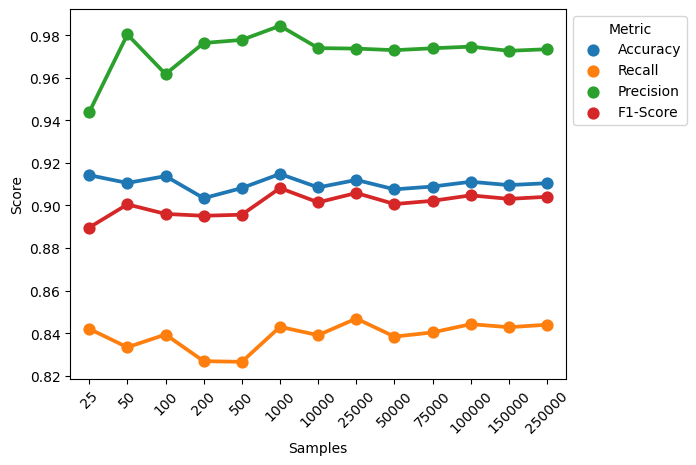

In [4]:
''# Look at Experiment 2 Results Cluster Size
from pprint import pprint
from joblib import load
import seaborn as sns
import numpy as np
import pandas as pd

results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment03_unbalanced_clusters.pkl') #  columns=['Seed', 'Year', 'Accuracy', 'Recall', 'Precision', 'Score'])
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment02_cluster_size.pkl')
# columns = ['Seed', 'Samples', 'Accuracy', 'Recall', 'Precision', 'Score']
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_real_gaussian_C1.pkl')
print(results.copy().groupby(['Samples']).mean())
print(results.copy().groupby(['Samples']).mean().groupby(['Seed']).mean())
#sns.barplot(results, x='Samples', y='Recall')
#plt.show()
results = results.drop(columns=['Seed'])
results = results.rename(columns={"Score": "F1-Score"})
#results = results[results['Samples']<1000]
results = results.groupby(['Samples']).mean()
results = results.reset_index()
print(results)

#sns.pointplot(data = results, x=results.index, y='F1-Score')
#sns.pointplot(data = results, x=results.index, y='Recall')
ax = sns.pointplot(data = pd.melt(results, ['Samples'], var_name = 'Metric', value_name = 'Score'), x='Samples', y='Score', hue='Metric')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
#ax.set_xticks(['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000'])
#ax.set_xticks(range(13), labels=['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000']) # <--- set the ticks first
plt.show()

     Seed  Start_Year  End_Year  \
0       0           1         4   
1       0           5         8   
2       0           9        12   
3       0          13        16   
4       0          16        20   
..    ...         ...       ...   
495    99           1         4   
496    99           5         8   
497    99           9        12   
498    99          13        16   
499    99          16        20   

                                Mahalanobis_migrant_c0  \
0    [19.746581953845794, 22.944940597057162, 27.71...   
1    [41.99767674751069, 51.50114220460048, 62.5808...   
2    [89.46919879669113, 105.27777106766293, 122.66...   
3    [162.16114810139038, 184.27482718623878, 207.9...   
4    [233.23101546635087, 260.07352466161115, 288.4...   
..                                                 ...   
495  [2.6197390877757973, 4.2112822904211145, 8.000...   
496  [22.170281230669673, 32.55140398819009, 45.129...   
497  [76.87914159306881, 96.04984390546704, 117.417...   

[(0.5, 1.01)]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1-4'),
  Text(1, 0, '5-8'),
  Text(2, 0, '9-12'),
  Text(3, 0, '13-16'),
  Text(4, 0, '16-20')])

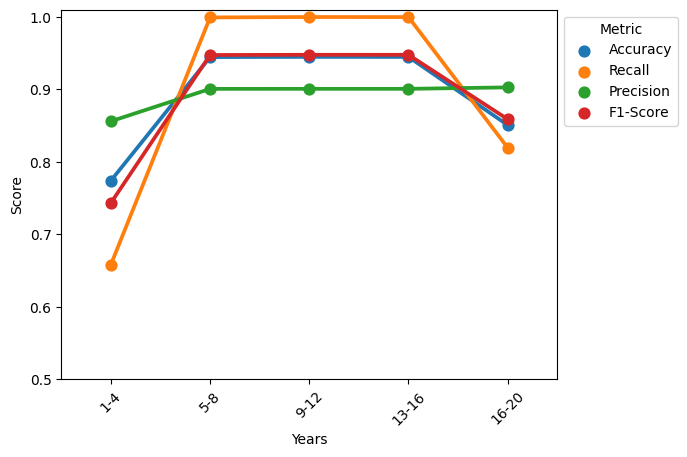

In [6]:
# Look at Experiment 1 Migration Progress Groups of Years
from pprint import pprint
from joblib import load
import seaborn as sns
import numpy as np
import pandas as pd
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_seeds.pkl')
results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_seeds_multiplier_1_5.pkl')
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_real_gaussian_C1.pkl')
print(results)
results = results.drop(columns=['Mahalanobis_migrant_c0', 'Mahalanobis_migrant_c1', 'Min_Mahalanobis', 'Mahalanobis_c0', 'Mahalanobis_c1'])

print(results.copy().groupby(['Start_Year']).mean())
print(results.copy().groupby(['Start_Year']).mean().groupby(['Seed']).mean())

#sns.barplot(results, x='Samples', y='Recall')
#plt.show()
cols = ['Start_Year', 'End_Year']
results['Years'] = results[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
results = results.drop(columns=cols)
results = results.drop(columns=['Seed'])
results = results.rename(columns={"Score": "F1-Score"})
#results = results[results['Samples']<1000]
results = results.groupby(['Years']).mean()
results = results.reset_index()
print(results)



#sns.pointplot(data = results, x=results.index, y='F1-Score')
#sns.pointplot(data = results, x=results.index, y='Recall')
order = ["1-4", "5-8", "9-12", "13-16", "16-20"]
ax = sns.pointplot(data = pd.melt(results, ['Years'], var_name = 'Metric', value_name = 'Score'), x='Years', y='Score', hue='Metric', order=order)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(ylim=(0.5, 1.01))
plt.xticks(rotation=45)
#ax.set_xticks(['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000'])
#ax.set_xticks(range(13), labels=['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000']) # <--- set the ticks first
plt.show()
columns=['Seed', 'Start_Year', 'End_Year', 'Mahalanobis_migrant_c0', 'Mahalanobis_migrant_c1', 'Min_Mahalanobis', 'Mahalanobis_c0', 'Mahalanobis_c1', 'Accuracy', 'Recall', 'Precision', 'Score']
columns=['Seed', 'Start_Year', 'End_Year', 'Accuracy', 'Recall', 'Precision', 'Score']

''

18.891821

18.09295

6.6579719235812265

4.0779500719590835

6.638589579822902

3.818120274225069

<Axes: xlabel='Year', ylabel='Mahalanobis Distance'>

0       7.497649
1       9.864825
2      14.131399
3      20.297372
4      28.362743
5      38.327512
6      50.191679
7      63.955245
8      79.618099
9      97.100347
10    114.720958
11    121.590074
12    107.339174
13     84.769250
14     63.937645
15     46.320602
16     31.967044
17     20.876973
18     13.050387
19      8.487287
Name: Mahalanobis Distance, dtype: float64


"\n# Average Prediction of Migrant\nresults = results.drop(columns=['End_Year'])\nresults = results.drop(columns=['Seed'])\nresults['Migrant_Prediction'] = results['Migrant_Prediction'].apply(np.sum)\nresults = results.drop(columns=[ 'Min_Mahalanobis', 'Mahalanobis_migrant_c0', 'Mahalanobis_migrant_c1', 'Mahalanobis_c0', 'Mahalanobis_c1'])\nresults = results.groupby(['Start_Year']).mean()\nresults = results.reset_index()\nsns.pointplot( data = results, x='Start_Year', y='Migrant_Prediction')\nplt.xticks(rotation=45)\nplt.show()\n"

'\n# Metric Visualization\nresults = results.drop(columns=[ \'Migrant_Prediction\', \'Mahalanobis_migrant_c0\', \'Mahalanobis_migrant_c1\', \'Min_Mahalanobis\', \'Mahalanobis_c0\', \'Mahalanobis_c1\'])\nprint(results.copy().groupby([\'Start_Year\']).mean())\nprint(results.copy().groupby([\'Start_Year\']).mean().groupby([\'Seed\']).mean())\n#sns.barplot(results, x=\'Samples\', y=\'Recall\')\n#plt.show()\n#cols = [\'Start_Year\', \'End_Year\']\n#results[\'Years\'] = results[cols].apply(lambda row: \'-\'.join(row.values.astype(str)), axis=1)\nresults = results.drop(columns=[\'End_Year\'])\nresults = results.drop(columns=[\'Seed\'])\nresults = results.rename(columns={"Score": "F1-Score", "Start_Year": "Year"})\n#results = results[results[\'Samples\']<1000]\nresults = results.groupby([\'Year\']).mean()\nresults = results.reset_index()\nprint(results)\n\n#sns.pointplot(data = results, x=results.index, y=\'F1-Score\')\n#sns.pointplot(data = results, x=results.index, y=\'Recall\')\nax = sns.po

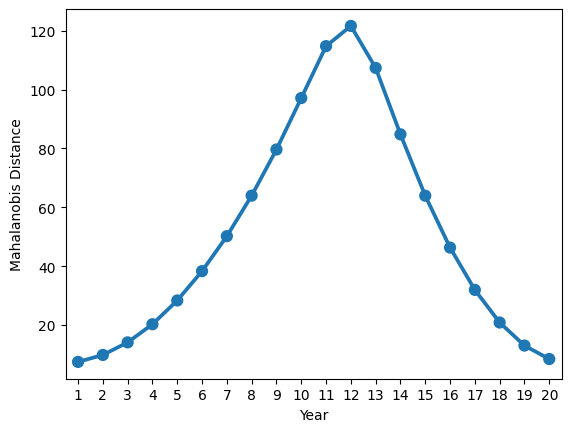

In [62]:
''# Look at Experiment 1 Migration Progress per Year
from pprint import pprint
from joblib import load
import seaborn as sns
import numpy as np
import pandas as pd
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_per_years_seeds_C1.pkl')
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_seeds_multiplier_1_5.pkl')
# columns = ['Seed', 'Samples', 'Accuracy', 'Recall', 'Precision', 'Score']
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_real_gaussian_C1.pkl')
results = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_per_years_seeds_multiplier_2.pkl")
#results = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_per_years_seeds_multiplier_1_5.pkl")
6.657971 + 3* 4.077950

6.638590 + 3 * 3.818120
np.mean(results['Mahalanobis_c0'].iloc[0])
np.std(results['Mahalanobis_c0'].iloc[0])

np.mean(results['Mahalanobis_c1'].iloc[0])
np.std(results['Mahalanobis_c1'].iloc[0])
# Mahalanobis Distance Visualization
results = results.drop(columns=['End_Year'])
results = results.drop(columns=['Seed'])
results['Min_Mahalanobis'] = results['Min_Mahalanobis'].apply(np.mean)

results = results.drop(columns=[ 'Migrant_Prediction', 'Mahalanobis_migrant_c0', 'Mahalanobis_migrant_c1', 'Mahalanobis_c0', 'Mahalanobis_c1'])
results = results.groupby(['Start_Year']).mean()
results = results.reset_index()
results = results.rename(columns={"Start_Year": "Year", "Min_Mahalanobis": "Mahalanobis Distance"})
sns.pointplot( data = results, x='Year', y='Mahalanobis Distance')
#ax = sns.pointplot(data = pd.melt(results, ['Year'], var_name = 'Data', value_name = 'Mahalanobis Distance'), x='Year', y='Mahalanobis Distance', hue='Metric')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(results['Mahalanobis Distance'])
"""
# Average Prediction of Migrant
results = results.drop(columns=['End_Year'])
results = results.drop(columns=['Seed'])
results['Migrant_Prediction'] = results['Migrant_Prediction'].apply(np.sum)
results = results.drop(columns=[ 'Min_Mahalanobis', 'Mahalanobis_migrant_c0', 'Mahalanobis_migrant_c1', 'Mahalanobis_c0', 'Mahalanobis_c1'])
results = results.groupby(['Start_Year']).mean()
results = results.reset_index()
sns.pointplot( data = results, x='Start_Year', y='Migrant_Prediction')
plt.xticks(rotation=45)
plt.show()
"""
"""
# Metric Visualization
results = results.drop(columns=[ 'Migrant_Prediction', 'Mahalanobis_migrant_c0', 'Mahalanobis_migrant_c1', 'Min_Mahalanobis', 'Mahalanobis_c0', 'Mahalanobis_c1'])
print(results.copy().groupby(['Start_Year']).mean())
print(results.copy().groupby(['Start_Year']).mean().groupby(['Seed']).mean())
#sns.barplot(results, x='Samples', y='Recall')
#plt.show()
#cols = ['Start_Year', 'End_Year']
#results['Years'] = results[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
results = results.drop(columns=['End_Year'])
results = results.drop(columns=['Seed'])
results = results.rename(columns={"Score": "F1-Score", "Start_Year": "Year"})
#results = results[results['Samples']<1000]
results = results.groupby(['Year']).mean()
results = results.reset_index()
print(results)

#sns.pointplot(data = results, x=results.index, y='F1-Score')
#sns.pointplot(data = results, x=results.index, y='Recall')
ax = sns.pointplot(data = pd.melt(results, ['Year'], var_name = 'Metric', value_name = 'Score'), x='Year', y='Score', hue='Metric')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set(ylim=(0.5, 1.01))
plt.xticks(rotation=45)
#ax.set_xticks(['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000'])
#ax.set_xticks(range(13), labels=['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000']) # <--- set the ticks first
plt.show()
"""
columns = ['Seed', 'Start_Year', 'End_Year', 'Migrant_Prediction' ,'Mahalanobis_migrant_c0', 'Mahalanobis_migrant_c1', 'Min_Mahalanobis', 'Mahalanobis_c0', 'Mahalanobis_c1', 'Accuracy', 'Recall', 'Precision', 'Score']

columns=['Seed', 'Start_Year', 'End_Year', 'Accuracy', 'Recall', 'Precision', 'Score']


                    Seed  Trace Cluster 0  Trace Cluster 1  \
Multiplier for STD                                           
1.0                  2.0         0.022375         0.012537   
1.5                  2.0         0.050344         0.012537   
2.0                  2.0         0.089501         0.012537   
2.5                  2.0         0.139846         0.012537   
3.0                  2.0         0.201378         0.012537   
3.5                  2.0         0.274098         0.012537   
4.0                  2.0         0.358005         0.012537   
4.5                  2.0         0.453100         0.012537   
5.0                  2.0         0.559383         0.012537   
5.5                  2.0         0.676853         0.012537   
6.0                  2.0         0.805511         0.012537   
6.5                  2.0         0.945357         0.012537   
7.0                  2.0         1.096390         0.012537   
7.5                  2.0         1.258611         0.012537   
8.0     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.5'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.5'),
  Text(4, 0, '3.0'),
  Text(5, 0, '3.5'),
  Text(6, 0, '4.0'),
  Text(7, 0, '4.5'),
  Text(8, 0, '5.0'),
  Text(9, 0, '5.5'),
  Text(10, 0, '6.0'),
  Text(11, 0, '6.5'),
  Text(12, 0, '7.0'),
  Text(13, 0, '7.5'),
  Text(14, 0, '8.0'),
  Text(15, 0, '8.5'),
  Text(16, 0, '9.0'),
  Text(17, 0, '9.5'),
  Text(18, 0, '10.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '100.0')])

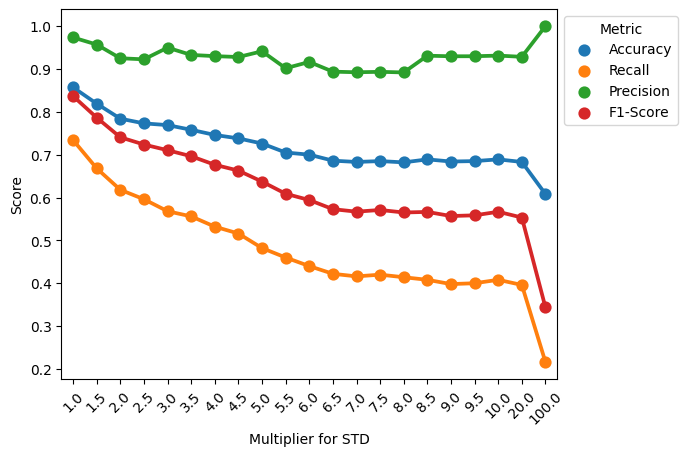

In [25]:
# Look at results for Experiment Spread Differences
from pprint import pprint
from joblib import load
import seaborn as sns
import numpy as np
import pandas as pd
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment04_Spread_Differences_C10E10_test.pkl')
results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment04_Spread_Differences_C10E10_rbf_test.pkl')
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_seeds_multiplier_1_5.pkl')
# columns = ['Seed', 'Samples', 'Accuracy', 'Recall', 'Precision', 'Score']
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_real_gaussian_C1.pkl')
print(results.copy().groupby(['Multiplier for STD']).mean())
print(results.copy().groupby(['Multiplier for STD']).mean().groupby(['Seed']).mean())
#sns.barplot(results, x='Samples', y='Recall')
#plt.show()
#cols = ['Start_Year', 'End_Year']
#results['Years'] = results[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
results = results.drop(columns=['Seed','Trace Cluster 0', "Trace Cluster 1","Determinant Cluster 0", "Determinant Cluster 0","Confusion Matrix"])
results = results.rename(columns={"Score": "F1-Score"})
#results = results[results['Samples']<1000]
results = results.groupby(['Multiplier for STD']).mean()
results = results.reset_index()
print(results)

#sns.pointplot(data = results, x=results.index, y='F1-Score')
#sns.pointplot(data = results, x=results.index, y='Recall')
ax = sns.pointplot(data = pd.melt(results, ['Multiplier for STD'], var_name = 'Metric', value_name = 'Score'), x='Multiplier for STD', y='Score', hue='Metric')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set(ylim=(0.5, 1.01))
plt.xticks(rotation=45)
#ax.set_xticks(['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000'])
#ax.set_xticks(range(13), labels=['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000']) # <--- set the ticks first
plt.show()

columns = ['Seed', 'Multiplier for STD','Trace Cluster 0', "Trace Cluster 1","Determinant Cluster 0", "Determinant Cluster 0","Confusion Matrix", 'Accuracy', 'Recall', 'Precision', 'Score']

    Multiplier for STD  Number of overlapping Dimensions
0                  1.0                               0.0
1                  1.1                               0.0
2                  1.2                               0.0
3                  1.3                               0.0
4                  1.4                               0.0
5                  1.5                               0.0
6                  1.6                               2.0
7                  1.7                               2.0
8                  1.8                               2.0
9                  1.9                               2.0
10                 2.0                               4.0
11                 2.1                               5.0
12                 2.2                               5.0
13                 2.3                               5.0
14                 2.4                               5.0
15                 2.5                               5.0
16                 2.6         

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.1'),
  Text(2, 0, '1.2'),
  Text(3, 0, '1.3'),
  Text(4, 0, '1.4'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.6'),
  Text(7, 0, '1.7'),
  Text(8, 0, '1.8'),
  Text(9, 0, '1.9'),
  Text(10, 0, '2.0'),
  Text(11, 0, '2.1'),
  Text(12, 0, '2.2'),
  Text(13, 0, '2.3'),
  Text(14, 0, '2.4'),
  Text(15, 0, '2.5'),
  Text(16, 0, '2.6'),
  Text(17, 0, '2.7'),
  Text(18, 0, '2.8'),
  Text(19, 0, '2.9'),
  Text(20, 0, '3.0')])

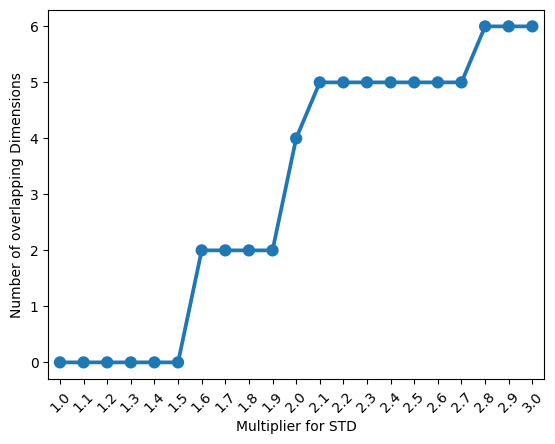

In [35]:
# Look at results for Experiment Spread Differences additional infos
from pprint import pprint
from joblib import load
import seaborn as sns
import numpy as np
import pandas as pd
results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment04_Spread_Differences_10E10_rbf_additional_Infos.pkl')
results.columns = ['Seed', 'Multiplier for STD','Trace Cluster 0', "Trace Cluster 1","Determinant Cluster 0", "Determinant Cluster 1","Confusion Matrix", 'Accuracy', 'Recall', 'Precision', 'Score', 'SVM F1-Score', 'Number of overlapping Dimensions']

results = results.drop(columns=['Seed', 'Accuracy', 'Recall', 'Precision', 'Trace Cluster 0', "Trace Cluster 1","Determinant Cluster 0", "Determinant Cluster 1","Confusion Matrix", "Score", 'SVM F1-Score'])

results = results.groupby(['Multiplier for STD']).mean()
results = results.reset_index()
print(results)

ax = sns.pointplot(data = results, x = "Multiplier for STD", y="Number of overlapping Dimensions")

plt.xticks(rotation=45)
plt.show()

columns = ['Seed', 'Multiplier for STD','Trace Cluster 0', "Trace Cluster 1","Determinant Cluster 0", "Determinant Cluster 0","Confusion Matrix", 'Accuracy', 'Recall', 'Precision', 'Score']

In [137]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#
from sklearn.preprocessing import MinMaxScaler
# Generate combined results from grid searches
# Look at results of gridsearch
#grid = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/parameter_tuning/grid_search_isotope_2-3.pkl")
#grid = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/parameter_tuning/grid_search_isotope_1-2.pkl')
#grid = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/grid_search_isotope_1-2_linear_n100.pkl')

# Step 1: Filter rows where 'param_svc__kernel' is 'linear'
#linear_df = results[results['param_svc__kernel'] == 'linear']
# Step 2: Find duplicates in 'param_svc__C' within the filtered data
#duplicates = linear_df.duplicated(subset='param_svc__C')
# Combine the duplicate mask with the 'linear' condition back onto the original DataFrame
# To get indices of the original DataFrame to drop
#indices_to_drop = linear_df[duplicates].index

# Step 3: Drop these indices from the original DataFrame
#results = results.drop(index=indices_to_drop)

grid = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/grid_search_isotope_reduced_linear_n100.pkl')
results = pd.DataFrame(grid.cv_results_)
results = results.sort_values('rank_test_score')
#groups = dict(tuple(results.groupby('Group')))
results.head(10)

grid = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/grid_search_isotope_reduced_rbf_n100.pkl')
results1 = pd.DataFrame(grid.cv_results_)
results1 = results1.sort_values('rank_test_score')
results1.head(10)

grid = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/grid_search_isotope_reduced_poly_n20.pkl')
results2 = pd.DataFrame(grid.cv_results_)
results2 = results2.sort_values('rank_test_score')
results2.head(10)

#res = pd.concat([results2.head(2), results.head(2),results1.head(2)], axis=0, ignore_index=True) # Best two per kernel
res = pd.concat([results2, results,results1], axis=0, ignore_index=True) # All results
res = res.sort_values('mean_test_score', ascending=False)
res.head(20)
#dump(res, "/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/grid_search_isotope_1-3_combined")

"""
grid = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/grid_search_isotope_reduced_poly_n100.pkl')
grid = pd.DataFrame(grid.cv_results_)
grid = grid[(grid['mean_test_score'].isna()) ]
grid.sort_values('param_svc__gamma')
"""
"""# Read Isotope Data Set
isodata = pd.read_csv("/home/jan/CAU/Masterarbeit/Datenbanktabelle_cleaned.csv")
# Create Groups for North of Alps, Inneralpine, and southern Tirol
site_group = pd.DataFrame(isodata["site code"].values /100)
isodata['site group'] = site_group
isodata['site group'] = isodata['site group'].astype('int64')
# Delete single outlier
#isodata[isodata['206Pb/207Pb']>1.3]
isodata.drop(isodata[isodata['206Pb/207Pb']>1.3].index, inplace=True)
#isodata[isodata['206Pb/207Pb']>1.3]
cols = ["87Sr/86Sr", "208Pb/204Pb", "207Pb/204Pb", "206Pb/204Pb", "208Pb/207Pb", "206Pb/207Pb"]

# Select two groups
isodata = isodata.query('`site group` == 1 | `site group` == 2')
isodata.loc[isodata['site group'] == 1, 'site group'] =0
isodata.loc[isodata['site group'] == 2, 'site group'] =1

scaler = MinMaxScaler() #Can be changed to robustscaler or standardscaler



# Scaling adjusted before splitting
isodata[cols] = scaler.fit_transform(isodata[cols])

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
predictions = grid.predict(isodata[cols])
print(classification_report(isodata['site group'],predictions))
cm = confusion_matrix(isodata['site group'], predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
"""

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__cache_size,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.005193,0.000301,0.004362,0.000154,705.480231,500,linear,"{'svc__C': 705.4802310718645, 'svc__cache_size...",0.960000,0.923077,1.000000,1.0,0.736842,0.923984,0.097854,1
41,0.005075,0.000204,0.004421,0.000137,932.603347,500,linear,"{'svc__C': 932.60334688322, 'svc__cache_size':...",0.960000,0.923077,1.000000,1.0,0.736842,0.923984,0.097854,1
39,0.005463,0.002171,0.004679,0.001250,533.669923,500,linear,"{'svc__C': 533.6699231206312, 'svc__cache_size...",0.960000,0.923077,1.000000,1.0,0.736842,0.923984,0.097854,1
46,0.003696,0.000701,0.002784,0.000482,3764.935807,500,linear,"{'svc__C': 3764.9358067924713, 'svc__cache_siz...",0.960000,0.923077,0.956522,1.0,0.736842,0.915288,0.092498,4
45,0.004716,0.002190,0.003031,0.000853,2848.035868,500,linear,"{'svc__C': 2848.035868435805, 'svc__cache_size...",0.960000,0.923077,0.956522,1.0,0.736842,0.915288,0.092498,4
44,0.004099,0.000853,0.003201,0.000926,2154.43469,500,linear,"{'svc__C': 2154.4346900318865, 'svc__cache_siz...",0.960000,0.923077,0.956522,1.0,0.736842,0.915288,0.092498,4
43,0.003620,0.000518,0.002647,0.000406,1629.750835,500,linear,"{'svc__C': 1629.7508346206434, 'svc__cache_siz...",0.960000,0.923077,0.956522,1.0,0.736842,0.915288,0.092498,4
42,0.004880,0.000176,0.004246,0.000128,1232.846739,500,linear,"{'svc__C': 1232.8467394420659, 'svc__cache_siz...",0.960000,0.923077,0.956522,1.0,0.736842,0.915288,0.092498,4
38,0.004445,0.001218,0.003397,0.000884,403.701726,500,linear,"{'svc__C': 403.70172585965577, 'svc__cache_siz...",0.960000,0.923077,1.000000,1.0,0.666667,0.909949,0.124966,9
35,0.005040,0.000979,0.004243,0.000942,174.75284,500,linear,"{'svc__C': 174.7528400007683, 'svc__cache_size...",0.923077,0.960000,1.000000,1.0,0.666667,0.909949,0.124966,9


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__cache_size,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9127,0.005855,0.000407,0.004816,0.000088,1072267222.010325,500,0.000004,rbf,"{'svc__C': 1072267222.0103253, 'svc__cache_siz...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
9727,0.008476,0.004832,0.011443,0.008050,5722367659.35022,500,0.000004,rbf,"{'svc__C': 5722367659.35022, 'svc__cache_size'...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
9627,0.012030,0.005254,0.004949,0.000117,4328761281.083061,500,0.000004,rbf,"{'svc__C': 4328761281.083061, 'svc__cache_size...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
8727,0.005750,0.000141,0.004946,0.000086,351119173.421513,500,0.000004,rbf,"{'svc__C': 351119173.4215127, 'svc__cache_size...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
9427,0.009149,0.006480,0.004871,0.000061,2477076355.991714,500,0.000004,rbf,"{'svc__C': 2477076355.991714, 'svc__cache_size...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
8627,0.007313,0.000829,0.006301,0.000200,265608778.294668,500,0.000004,rbf,"{'svc__C': 265608778.2946684, 'svc__cache_size...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
9927,0.012490,0.007740,0.005004,0.000172,10000000000.0,500,0.000004,rbf,"{'svc__C': 10000000000.0, 'svc__cache_size': 5...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
9027,0.006004,0.000918,0.004888,0.000471,811130830.789689,500,0.000004,rbf,"{'svc__C': 811130830.789689, 'svc__cache_size'...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
9527,0.005387,0.000513,0.004267,0.000447,3274549162.877732,500,0.000004,rbf,"{'svc__C': 3274549162.877732, 'svc__cache_size...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1
8827,0.005504,0.000446,0.004661,0.000159,464158883.361279,500,0.000004,rbf,"{'svc__C': 464158883.36127913, 'svc__cache_siz...",0.96,1.0,1.0,1.0,0.909091,0.973818,0.03588,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__cache_size,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
790,0.009057,0.006633,0.008261,0.006556,1623776.739189,500,2,0.006952,poly,"{'svc__C': 1623776.7391887177, 'svc__cache_siz...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
214,0.006976,0.000293,0.006564,0.000075,0.78476,500,3,3.79269,poly,"{'svc__C': 0.7847599703514611, 'svc__cache_siz...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
433,0.005882,0.000534,0.005463,0.000949,263.66509,500,2,0.78476,poly,"{'svc__C': 263.6650898730355, 'svc__cache_size...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
1169,0.006113,0.001110,0.005377,0.001201,10000000000.0,500,3,0.001438,poly,"{'svc__C': 10000000000.0, 'svc__cache_size': 5...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
990,0.005952,0.000108,0.005650,0.000646,127427498.570313,500,3,0.006952,poly,"{'svc__C': 127427498.57031322, 'svc__cache_siz...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
16,0.002914,0.000108,0.002308,0.000089,0.01,500,2,88.586679,poly,"{'svc__C': 0.01, 'svc__cache_size': 500, 'svc_...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
671,0.006698,0.000313,0.006182,0.000151,88586.679041,500,2,0.033598,poly,"{'svc__C': 88586.67904100814, 'svc__cache_size...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
552,0.009147,0.006620,0.009801,0.009718,4832.930239,500,2,0.162378,poly,"{'svc__C': 4832.930238571752, 'svc__cache_size...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
1088,0.008447,0.001288,0.007826,0.001697,2335721469.090121,500,2,0.000298,poly,"{'svc__C': 2335721469.0901213, 'svc__cache_siz...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1
314,0.005645,0.000287,0.004682,0.000087,14.384499,500,2,3.79269,poly,"{'svc__C': 14.38449888287663, 'svc__cache_size...",0.96,0.96,1.0,1.0,0.869565,0.957913,0.047659,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__cache_size,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1311,0.005736,0.000329,0.004836,0.000170,1873817422.860387,500,NaN,0.000004,rbf,"{'svc__C': 1873817422.8603868, 'svc__cache_siz...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1305,0.007313,0.000829,0.006301,0.000200,265608778.294668,500,NaN,0.000004,rbf,"{'svc__C': 265608778.2946684, 'svc__cache_size...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1312,0.005038,0.000858,0.004657,0.000376,1417474162.926808,500,NaN,0.000004,rbf,"{'svc__C': 1417474162.9268076, 'svc__cache_siz...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1310,0.006560,0.000334,0.006171,0.000084,613590727.341319,500,NaN,0.000004,rbf,"{'svc__C': 613590727.3413188, 'svc__cache_size...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1309,0.005504,0.000446,0.004661,0.000159,464158883.361279,500,NaN,0.000004,rbf,"{'svc__C': 464158883.36127913, 'svc__cache_siz...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1307,0.006004,0.000918,0.004888,0.000471,811130830.789689,500,NaN,0.000004,rbf,"{'svc__C': 811130830.789689, 'svc__cache_size'...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1306,0.012490,0.007740,0.005004,0.000172,10000000000.0,500,NaN,0.000004,rbf,"{'svc__C': 10000000000.0, 'svc__cache_size': 5...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1308,0.005387,0.000513,0.004267,0.000447,3274549162.877732,500,NaN,0.000004,rbf,"{'svc__C': 3274549162.877732, 'svc__cache_size...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1304,0.009149,0.006480,0.004871,0.000061,2477076355.991714,500,NaN,0.000004,rbf,"{'svc__C': 2477076355.991714, 'svc__cache_size...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1
1303,0.005750,0.000141,0.004946,0.000086,351119173.421513,500,NaN,0.000004,rbf,"{'svc__C': 351119173.4215127, 'svc__cache_size...",0.960000,1.00,1.0,1.0,0.909091,0.973818,0.035880,1


"\ngrid = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/models/grid_search_isotope_reduced_poly_n100.pkl')\ngrid = pd.DataFrame(grid.cv_results_)\ngrid = grid[(grid['mean_test_score'].isna()) ]\ngrid.sort_values('param_svc__gamma')\n"

'# Read Isotope Data Set\nisodata = pd.read_csv("/home/jan/CAU/Masterarbeit/Datenbanktabelle_cleaned.csv")\n# Create Groups for North of Alps, Inneralpine, and southern Tirol\nsite_group = pd.DataFrame(isodata["site code"].values /100)\nisodata[\'site group\'] = site_group\nisodata[\'site group\'] = isodata[\'site group\'].astype(\'int64\')\n# Delete single outlier\n#isodata[isodata[\'206Pb/207Pb\']>1.3]\nisodata.drop(isodata[isodata[\'206Pb/207Pb\']>1.3].index, inplace=True)\n#isodata[isodata[\'206Pb/207Pb\']>1.3]\ncols = ["87Sr/86Sr", "208Pb/204Pb", "207Pb/204Pb", "206Pb/204Pb", "208Pb/207Pb", "206Pb/207Pb"]\n\n# Select two groups\nisodata = isodata.query(\'`site group` == 1 | `site group` == 2\')\nisodata.loc[isodata[\'site group\'] == 1, \'site group\'] =0\nisodata.loc[isodata[\'site group\'] == 2, \'site group\'] =1\n\nscaler = MinMaxScaler() #Can be changed to robustscaler or standardscaler\n\n\n\n# Scaling adjusted before splitting\nisodata[cols] = scaler.fit_transform(isodata[c

"\nresult = result.sort_values(by=['Earliest positive Prediction at Multiplier'], ascending=False).head(50)\n#result[['Migrant','Earliest positive Prediction at Multiplier']]\nplot_data = result.loc[result['Earliest positive Prediction at Multiplier'] != -1].sort_values(by=['Earliest positive Prediction at Multiplier'], ascending=False)\nax = sns.barplot(plot_data, y='Burial', x='Earliest positive Prediction at Multiplier', hue='Migrant')\n#plt.figure(figsize=(100,8))\n#plt.xticks(rotation=45)\nax.set_yticklabels(ax.get_yticklabels(), fontsize=5)\n"

'\n# Create Plot based on average Rank old ranking without logarithmic grid\nm1 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 8 Gamma: 5.pkl")\nm2 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 10 Gamma: 5.pkl")\nm3 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: 0.8.pkl")\nm4 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: 1.pkl")\nm5 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: 3.pkl")\nm6 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: scale.pkl")\nm7 = load("/home/jan

'\nm1["rank"] = m1["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm2["rank"] = m2["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm3["rank"] = m3["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm4["rank"] = m4["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm5["rank"] = m5["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm6["rank"] = m6["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm7["rank"] = m7["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm8["rank"] = m8["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm9["rank"] = m9["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\nm10["rank"] = m10["\'Earliest positive Prediction at Multiplier\'"].rank(method=\'min\')\n'

'\n# Test-Run for larger mult T2_m\nm1 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: linear C: 705.4802310718645 Gamma: nan.pkl\')\nm2 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: linear C: 932.60334688322 Gamma: nan.pkl\')\nm3 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: poly C: 0.7847599703514611 Gamma: 3.792690190732254.pkl\')\nm4 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: poly C: 1623776.7391887177 Gamma: 0.0069519279617756054.pkl\')\nm5 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: rbf C: 1072267222.0103253 Gamma: 3.5111917342151347e-06.pkl\')\nm6 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/prediction

'\n# For best 10\n\n# Create Plot based on average Rank with new logarithmic grid\nm1 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 265608778.2946684 Gamma: 3.5111917342151347e-06.pkl")\nm2 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 351119173.4215127 Gamma: 3.5111917342151347e-06.pkl")\nm3 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 613590727.3413188 Gamma: 3.5111917342151347e-06.pkl")\nm4 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 1072267222.0103253 Gamma: 3.5111917342151347e-06.pkl")\nm5 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_data

      Burial  Average Rank
0     11/T45      1.000000
1   US30/188      1.000000
2         77      2.666667
3         44      4.000000
4    77 u.O.      5.166667
..       ...           ...
87        53     34.000000
88        48     34.000000
89        33     34.000000
90       104     34.000000
91        40     34.000000

[92 rows x 2 columns]


/tmp/ipykernel_4935/1731191594.py:106: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  m1["rank1"] = m1["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
/tmp/ipykernel_4935/1731191594.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  m1["rank2"] = m2["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
/tmp/ipykernel_4935/1731191594.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

<Figure size 1000x2000 with 0 Axes>

2


Text(0, 0.5, 'Burial')

Text(0.5, 0, 'Average Rank')

Text(0, 0.5, 'Burial')

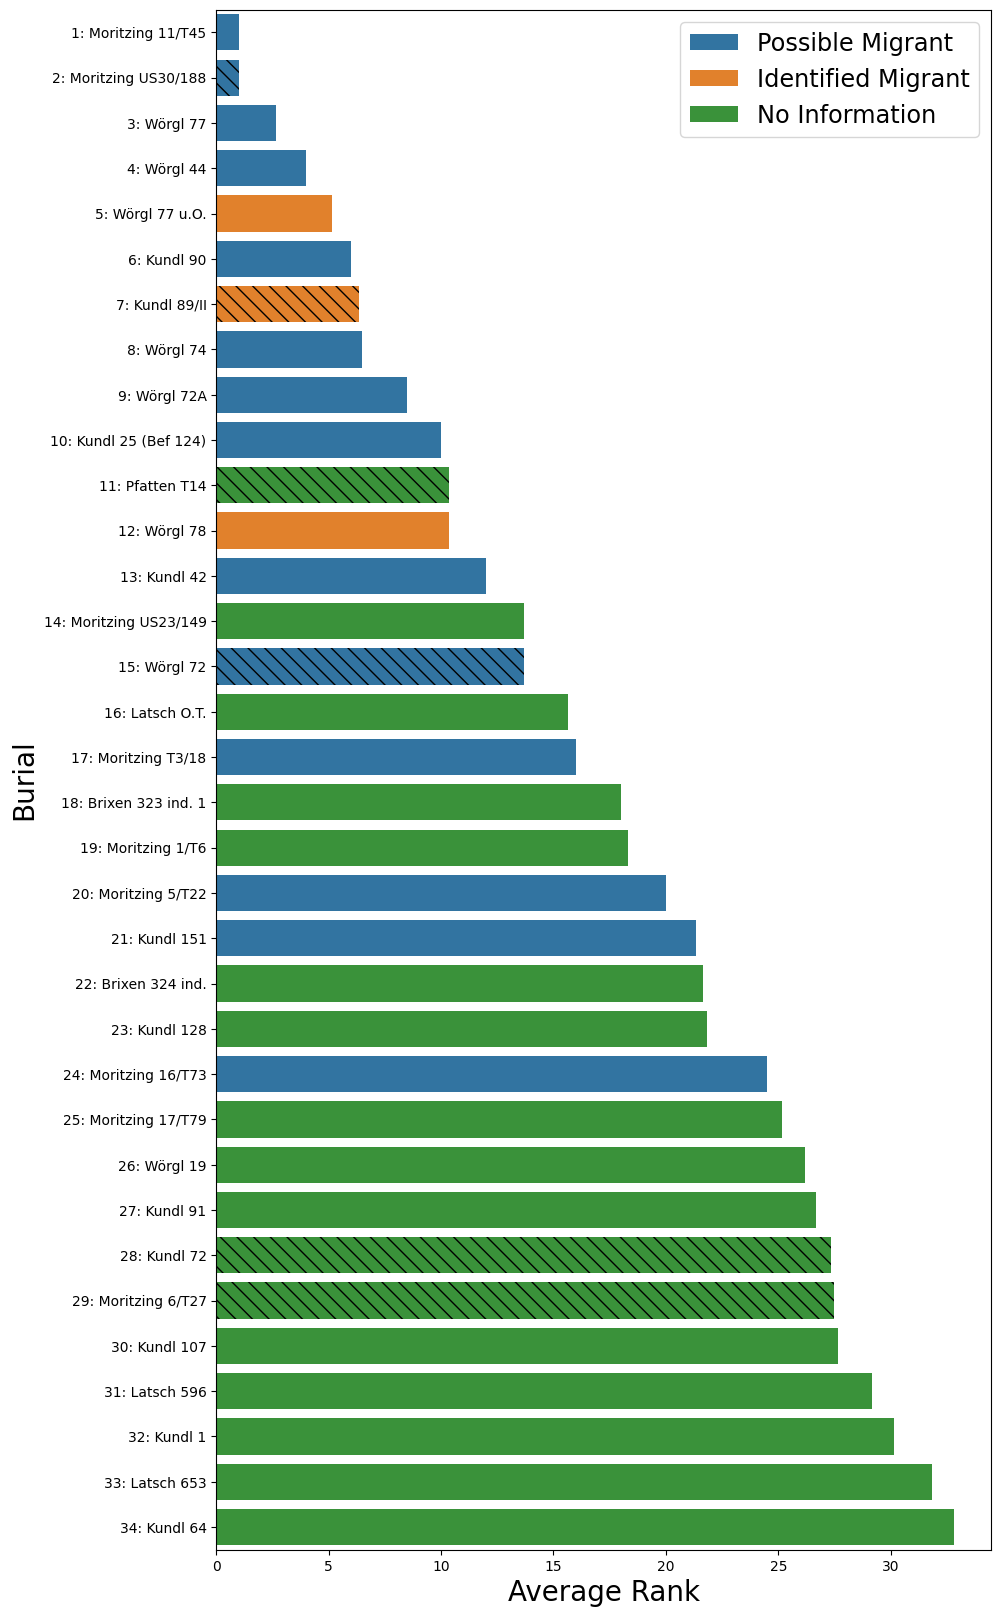

['/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/datasets/Fritzens_Sanzeno_Candidates.pkl']

'\n# Select all samples that have been predicted as migrants at some point\nplot_data[plot_data[\'Average Rank\'] < plot_data[\'Average Rank\'].max()]\nlabeled = plot_data[plot_data[\'Average Rank\'] < plot_data[\'Average Rank\'].max()]\ndump(labeled, "/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_best10_positive_predictions.pkl")\n'

'\n# Create pairplot of results\nunscaled_isodata = pd.read_csv("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/datasets/tabula-Grupe_cleaned.csv")\nunscaled_isodata[\'Average Rank\'] = plot_data[\'Average Rank\']\n# Define marker styles "Circle", "Square", "Diamond"\nmarker_styles = [\'o\', \'s\', \'D\']  \n# Map species to marker styles  (read again as  "Circle", "Square", "Diamond")\nspecies_to_marker = {0: \'o\', 1: \'D\'}\nunscaled_isodata[\'markers\'] = unscaled_isodata[\'site group\'].map(species_to_marker)\n# Pass marker style column to scatterplot arguments\n# This sort of works:  at least maps the variable to the default marker style:\nscatter_kws = {\'s\': 100, \'alpha\': 0.8, \'style\': unscaled_isodata[\'site group\'], \'markers\': species_to_marker}  # \'style\' assigns DEFAULT markers which can be interpreted as "circle, x, square"  \n\ncols = ["87Sr/86Sr", "208Pb/204Pb", "207Pb/204Pb", "206Pb/204Pb", "208Pb/207Pb", "206Pb/207Pb"]\np = sns.p

"\n# ensure axes match on each pairplotplt.legend(title='Team', fontsize='medium', title_fontsize='x-large')\nfor ax in p.axes.flatten():\n    xlab = ax.get_xlabel()\n    if len(xlab)==0: continue\n    if xlab == '87Sr/86Sr':\n        ax.set_xlim([lims_by_col[xlab]])\n\n    ylab = ax.get_ylabel()\n    if len(ylab)==0: continue\n    if xlab == '87Sr/86Sr':\n        ax.set_xlim(lims_by_col[ylab])\n"

'\n#results = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_seeds_multiplier_1_5.pkl\')\n# columns = [\'Seed\', \'Samples\', \'Accuracy\', \'Recall\', \'Precision\', \'Score\']\n#results = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_real_gaussian_C1.pkl\')\nprint(results.copy().groupby([\'Multiplier for STD\']).mean())\nprint(results.copy().groupby([\'Multiplier for STD\']).mean().groupby([\'Seed\']).mean())\n#sns.barplot(results, x=\'Samples\', y=\'Recall\')\n#plt.show()\n#cols = [\'Start_Year\', \'End_Year\']\n#results[\'Years\'] = results[cols].apply(lambda row: \'-\'.join(row.values.astype(str)), axis=1)\nresults = results.drop(columns=[\'Seed\',\'Trace Cluster 0\', "Trace Cluster 1","Determinant Cluster 0", "Determinant Cluster 0","Confusion Matrix"])\nresults = results.rename(columns={"Score": "F1-Score"})\n#results = results[results[\'Samples\']<1000]\nresults = 

In [128]:
# Take a look at reduced isotope dataset prediction
from joblib import load
import seaborn as sns
from itertools import cycle
import numpy as np
import pandas as pd
from matplotlib.container import BarContainer
models = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/models/best_models_reduced_dataset.pkl')
result = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: scale.pkl')
result = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset.pkl')
cols = result.columns
"""
result = result.sort_values(by=['Earliest positive Prediction at Multiplier'], ascending=False).head(50)
#result[['Migrant','Earliest positive Prediction at Multiplier']]
plot_data = result.loc[result['Earliest positive Prediction at Multiplier'] != -1].sort_values(by=['Earliest positive Prediction at Multiplier'], ascending=False)
ax = sns.barplot(plot_data, y='Burial', x='Earliest positive Prediction at Multiplier', hue='Migrant')
#plt.figure(figsize=(100,8))
#plt.xticks(rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=5)
"""
"""
# Create Plot based on average Rank old ranking without logarithmic grid
m1 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 8 Gamma: 5.pkl")
m2 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 10 Gamma: 5.pkl")
m3 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: 0.8.pkl")
m4 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: 1.pkl")
m5 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: 3.pkl")
m6 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: scale.pkl")
m7 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 1000 Gamma: 3.pkl")
m8 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 1000 Gamma: scale.pkl")
m9 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100000000000.0 Gamma: 3.pkl")
m10 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100000000000.0 Gamma: scale.pkl")
"""



"""
m1["rank"] = m1["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m2["rank"] = m2["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m3["rank"] = m3["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m4["rank"] = m4["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m5["rank"] = m5["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m6["rank"] = m6["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m7["rank"] = m7["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m8["rank"] = m8["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m9["rank"] = m9["'Earliest positive Prediction at Multiplier'"].rank(method='min')
m10["rank"] = m10["'Earliest positive Prediction at Multiplier'"].rank(method='min')
"""
"""
# Test-Run for larger mult T2_m
m1 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: linear C: 705.4802310718645 Gamma: nan.pkl')
m2 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: linear C: 932.60334688322 Gamma: nan.pkl')
m3 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: poly C: 0.7847599703514611 Gamma: 3.792690190732254.pkl')
m4 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: poly C: 1623776.7391887177 Gamma: 0.0069519279617756054.pkl')
m5 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: rbf C: 1072267222.0103253 Gamma: 3.5111917342151347e-06.pkl')
m6 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/Test-RunKernel: rbf C: 5722367659.35022 Gamma: 3.5111917342151347e-06.pkl')

m1["rank1"] = m1["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank2"] = m2["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank3"] = m3["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank4"] = m4["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank5"] = m5["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank6"] = m6["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["Average Rank"] = m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6"]].mean(axis=1)
"""

"""
# For best 10

# Create Plot based on average Rank with new logarithmic grid
m1 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 265608778.2946684 Gamma: 3.5111917342151347e-06.pkl")
m2 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 351119173.4215127 Gamma: 3.5111917342151347e-06.pkl")
m3 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 613590727.3413188 Gamma: 3.5111917342151347e-06.pkl")
m4 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 1072267222.0103253 Gamma: 3.5111917342151347e-06.pkl")
m5 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 1873817422.8603868 Gamma: 3.5111917342151347e-06.pkl")
m6 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 2477076355.991714 Gamma: 3.5111917342151347e-06.pkl")
m7 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 3274549162.877732 Gamma: 3.5111917342151347e-06.pkl")
m8 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 4328761281.083061 Gamma: 3.5111917342151347e-06.pkl")
m9 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 5722367659.35022 Gamma: 3.5111917342151347e-06.pkl")
m10 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_gridKernel: rbf C: 10000000000.0 Gamma: 3.5111917342151347e-06.pkl")

m1["rank1"] = m1["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank2"] = m2["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank3"] = m3["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank4"] = m4["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank5"] = m5["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank6"] = m6["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank7"] = m7["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank8"] = m8["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank9"] = m9["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank10"] = m10["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["Average Rank"] = m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6", "rank7", "rank8", "rank9", "rank10"]].mean(axis=1)
m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6", "rank7", "rank8", "rank9", "rank10", "Average Rank"]]
print(m1["Average Rank"])
"""

# For best 2 per kernel
# Best 2 per Kernel reduced dataset
m1 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_grid_best_2_per_kernelKernel: linear C: 705.4802310718645 Gamma: nan.pkl')
m2 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_grid_best_2_per_kernelKernel: linear C: 932.60334688322 Gamma: nan.pkl')
m3 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_grid_best_2_per_kernelKernel: poly C: 0.7847599703514611 Gamma: 3.792690190732254.pkl')
m4 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_grid_best_2_per_kernelKernel: poly C: 1623776.7391887177 Gamma: 0.0069519279617756054.pkl')
m5 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_grid_best_2_per_kernelKernel: rbf C: 1072267222.0103253 Gamma: 3.5111917342151347e-06.pkl')
m6 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_exhaustive_grid_best_2_per_kernelKernel: rbf C: 5722367659.35022 Gamma: 3.5111917342151347e-06.pkl')

m1["rank1"] = m1["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank2"] = m2["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank3"] = m3["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank4"] = m4["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank5"] = m5["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank6"] = m6["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["Average Rank"] = m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6"]].mean(axis=1)


# Create barplot of ranks
plot_data = m1.sort_values(by=["Average Rank"], ascending=True).reset_index(drop=True)
plot_data['order'] = plot_data.index
#print(plot_data[["Burial","rank1", "rank2", "rank3", "rank4", "rank5", "rank6", "rank7", "rank8", "rank9", "rank10", "Average Rank"]].head(10))
print(plot_data[["Burial", "Average Rank"]])#.head(20))
plot_data = plot_data.reset_index()
plot_data['index'] = plot_data['index'] + 1
plot_data['index'] = plot_data['index'].astype(str)
plot_data['Burial_unique'] = plot_data['index'] + ": " + plot_data['Site'] + " " + plot_data['Burial']
# Add additional archaeologic context
archaeologic_context = pd.read_csv("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/datasets/tabula-Grupe_cleaned.csv")
plot_data['Identifier'] = plot_data['Site'] + plot_data['Burial']
archaeologic_context['Identifier'] = archaeologic_context['Site'] + archaeologic_context['Burial']
archaeologic_context = archaeologic_context[['Identifier', 'Archaeologic Context']]#, 'Archaeologic Context Reasoning']]
#plot_data['Identifier'].apply(str)
#archaeologic_context['Identifier'].apply(str)
plot_data = plot_data.astype({'Identifier': str})
archaeologic_context = archaeologic_context.astype({'Identifier': str, 'Archaeologic Context' : str})

plot_data = plot_data.set_index('Identifier').join(archaeologic_context.set_index('Identifier'))
#plot_data['hue'] = plot_data['Sample Information'] + "/" + plot_data['Archaeologic Context']

plt.figure(figsize=(10,20))
max_rank = plot_data['Average Rank'].max()
plot_data = plot_data[plot_data['Average Rank'] != max_rank] # Entferne alle mit max Rank - diese wurden nie als Migrant Candidate erkannt

plot_data = plot_data.sort_values(by=["order"], ascending=True).reset_index(drop=True)
ax = sns.barplot(plot_data, y='Burial_unique', x="Average Rank", hue='Sample Information', dodge=False, errorbar=None)#  order=plot_data.index,
# Add hatches based on additional archaeologic context
hatch_map = {
    "0" : "//",
    "1" : None,
    "2" : "\\\\"
}
plot_data['Archaeologic Context'] = plot_data['Archaeologic Context'].map(hatch_map)

plt.legend(fontsize='xx-large', title_fontsize='xx-large')


hatches_list = plot_data['Archaeologic Context'].to_numpy()
patches_list = list(ax.patches)
num_bars = int(len(patches_list)/3) # if more category change the 3
for i,thisbar_hatch in enumerate(ax.patches):
    # Set a different hatch for each bar
    if i < plot_data.shape[0]:
        if i == 14:
            print('2')
        hatch = plot_data['Archaeologic Context'].to_numpy()[i]
        thisbar_hatch.set_hatch(hatch) # Each Category needs to be colored: First Group
        patches_list[i].set_hatch(hatch)
        patches_list[i+num_bars].set_hatch(hatch) # Second Group
        patches_list[i+(2*num_bars)].set_hatch(hatch) # Third Group





#ax.set_xticklabels(plot_data["Average Rank"])
ax.set_ylabel("Burial")
plt.xlabel("Average Rank", fontsize=20)
plt.ylabel("Burial", fontsize=20)
#selection = plot_data.head(34)
plt.show()
dump(plot_data, "/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/datasets/Fritzens_Sanzeno_Candidates.pkl")

"""
# Select all samples that have been predicted as migrants at some point
plot_data[plot_data['Average Rank'] < plot_data['Average Rank'].max()]
labeled = plot_data[plot_data['Average Rank'] < plot_data['Average Rank'].max()]
dump(labeled, "/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset_best10_positive_predictions.pkl")
"""
"""
# Create pairplot of results
unscaled_isodata = pd.read_csv("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/datasets/tabula-Grupe_cleaned.csv")
unscaled_isodata['Average Rank'] = plot_data['Average Rank']
# Define marker styles "Circle", "Square", "Diamond"
marker_styles = ['o', 's', 'D']  
# Map species to marker styles  (read again as  "Circle", "Square", "Diamond")
species_to_marker = {0: 'o', 1: 'D'}
unscaled_isodata['markers'] = unscaled_isodata['site group'].map(species_to_marker)
# Pass marker style column to scatterplot arguments
# This sort of works:  at least maps the variable to the default marker style:
scatter_kws = {'s': 100, 'alpha': 0.8, 'style': unscaled_isodata['site group'], 'markers': species_to_marker}  # 'style' assigns DEFAULT markers which can be interpreted as "circle, x, square"  

cols = ["87Sr/86Sr", "208Pb/204Pb", "207Pb/204Pb", "206Pb/204Pb", "208Pb/207Pb", "206Pb/207Pb"]
p = sns.pairplot(unscaled_isodata, vars =cols, hue="Average Rank", plot_kws=scatter_kws)#, hue='site group')

# ensure axes match on each pairplot
for ax in p.axes.flatten():
    xlab = ax.get_xlabel()
    if len(xlab)==0: continue
    ax.set_xlim([unscaled_isodata[xlab].min() - unscaled_isodata[xlab].std(),unscaled_isodata[xlab].max() + unscaled_isodata[xlab].std()])

    ylab = ax.get_ylabel()
    if len(ylab)==0: continue
    ax.set_xlim([unscaled_isodata[xlab].min() - unscaled_isodata[xlab].std(),unscaled_isodata[xlab].max() + unscaled_isodata[xlab].std()])


lims_by_col = {'87Sr/86Sr':[0.708, 0.724]}#, "208Pb/204Pb":[37.9, 39], "207Pb/204Pb":[,15.725]}
"""
"""
# ensure axes match on each pairplotplt.legend(title='Team', fontsize='medium', title_fontsize='x-large')
for ax in p.axes.flatten():
    xlab = ax.get_xlabel()
    if len(xlab)==0: continue
    if xlab == '87Sr/86Sr':
        ax.set_xlim([lims_by_col[xlab]])

    ylab = ax.get_ylabel()
    if len(ylab)==0: continue
    if xlab == '87Sr/86Sr':
        ax.set_xlim(lims_by_col[ylab])
"""



"""
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_groups_of_years_seeds_multiplier_1_5.pkl')
# columns = ['Seed', 'Samples', 'Accuracy', 'Recall', 'Precision', 'Score']
#results = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/experiment_result/experiment01_real_gaussian_C1.pkl')
print(results.copy().groupby(['Multiplier for STD']).mean())
print(results.copy().groupby(['Multiplier for STD']).mean().groupby(['Seed']).mean())
#sns.barplot(results, x='Samples', y='Recall')
#plt.show()
#cols = ['Start_Year', 'End_Year']
#results['Years'] = results[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
results = results.drop(columns=['Seed','Trace Cluster 0', "Trace Cluster 1","Determinant Cluster 0", "Determinant Cluster 0","Confusion Matrix"])
results = results.rename(columns={"Score": "F1-Score"})
#results = results[results['Samples']<1000]
results = results.groupby(['Multiplier for STD']).mean()
results = results.reset_index()
print(results)

#sns.pointplot(data = results, x=results.index, y='F1-Score')
#sns.pointplot(data = results, x=results.index, y='Recall')
ax = sns.pointplot(data = pd.melt(results, ['Multiplier for STD'], var_name = 'Metric', value_name = 'Score'), x='Multiplier for STD', y='Score', hue='Metric')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set(ylim=(0.5, 1.01))
plt.xticks(rotation=45)
#ax.set_xticks(['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000'])
#ax.set_xticks(range(13), labels=['25','50','100','200','500','1000','10000','25000', '50000', '75000', '100000', '150000', '250000']) # <--- set the ticks first
plt.show()

columns = ['Seed', 'Multiplier for STD','Trace Cluster 0', "Trace Cluster 1","Determinant Cluster 0", "Determinant Cluster 0","Confusion Matrix", 'Accuracy', 'Recall', 'Precision', 'Score']

"""

'\n# For best 10\n# 1-2\n# Create Plot based on average Rank with new logarithmic grid\nm1 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 4.641588833612782 Gamma: 0.25353644939701164.pkl")\nm2 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 6.135907273413176 Gamma: 0.25353644939701164.pkl")\nm3 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 86974900.26177834 Gamma: 0.006734150657750828.pkl")\nm4 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 114975699.53977357 Gamma: 0.006734150657750828.pkl")\nm5 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 151991108.2952933 Gamma: 0.006734150657750828.

'\n# 1-3\n# For best 2 per kernel\n# Best 2 per Kernel reduced dataset\nm1 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: linear C: 8697.490026177835 Gamma: nan.pkl\')\nm2 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: linear C: 5336699.231206302 Gamma: nan.pkl\')\nm3 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: poly C: 4832.930238571752 Gamma: 10000.0.pkl\')\nm4 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: poly C: 88586.67904100814 Gamma: 18.329807108324374.pkl\')\nm5 = load(\'/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: rbf C: 132

/tmp/ipykernel_4935/4107098491.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  m1["rank1"] = m1["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
/tmp/ipykernel_4935/4107098491.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  m1["rank2"] = m2["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
/tmp/ipykernel_4935/4107098491.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10,Average Rank
146,55.0,58.0,58.0,58.0,59.0,58.0,59.0,59.0,58.0,58.0,58.0
147,51.0,53.0,53.0,53.0,54.0,54.0,54.0,54.0,54.0,54.0,53.4
148,11.0,12.0,12.0,12.0,12.0,13.0,12.0,12.0,13.0,13.0,12.2
149,16.0,17.0,17.0,18.0,12.0,13.0,12.0,12.0,13.0,13.0,14.3
150,23.0,24.0,25.0,25.0,29.0,25.0,29.0,27.0,25.0,25.0,25.7
...,...,...,...,...,...,...,...,...,...,...,...
296,43.0,42.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,42.9
297,11.0,12.0,12.0,12.0,16.0,13.0,16.0,15.0,13.0,13.0,13.3
298,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
299,29.0,31.0,32.0,32.0,35.0,33.0,35.0,35.0,33.0,33.0,32.8


146    58.0
147    53.4
148    12.2
149    14.3
150    25.7
       ... 
296    42.9
297    13.3
298     1.0
299    32.8
300    33.9
Name: Average Rank, Length: 155, dtype: float64
    burial ID/processing number  Average Rank
0                           452           1.0
1                            T3           1.0
2                            34           1.0
3                     US21/T147           1.0
4                     US30/T188           1.0
..                          ...           ...
150                         164          58.0
151                25 (Bef L10)          58.0
152                         154          58.0
153                        89/I          58.0
154                          17          58.0

[155 rows x 2 columns]


,index,site code,site name,sample ID,material type,dating,heat exposure,burial ID/processing number,87Sr/86Sr,2 SE (M) [%],...,rank5,rank6,rank7,rank8,rank9,rank10,Average Rank,Burial_unique,Burial and Burial ID,Fritzens Sanzeno Candidate
1,2,308,Pfatten,5308202,human,archaeological,cremated,T3,0.154225,0.0020,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2: Pfatten T3,PfattenT3,2
14,15,308,Pfatten,5308201,human,archaeological,cremated,T14,0.284507,0.0015,...,16.0,13.0,16.0,15.0,13.0,13.0,13.3,15: Pfatten T14,PfattenT14,1
35,36,308,Pfatten,5308203,human,archaeological,cremated,T4U,0.458451,0.0041,...,35.0,33.0,35.0,35.0,33.0,33.0,32.8,36: Pfatten T4U,PfattenT4U,2
36,37,308,Pfatten,5308204,human,archaeological,cremated,T4V,0.302817,0.0019,...,35.0,33.0,35.0,35.0,33.0,33.0,33.9,37: Pfatten T4V,PfattenT4V,2


<Figure size 500x1000 with 0 Axes>

Text(0, 0.5, 'Burial')

,index,site code,site name,sample ID,material type,dating,heat exposure,burial ID/processing number,87Sr/86Sr,2 SE (M) [%],...,rank5,rank6,rank7,rank8,rank9,rank10,Average Rank,Burial_unique,Burial and Burial ID,Fritzens Sanzeno Candidate


,index,site code,site name,sample ID,material type,dating,heat exposure,burial ID/processing number,87Sr/86Sr,2 SE (M) [%],...,rank5,rank6,rank7,rank8,rank9,rank10,Average Rank,Burial_unique,Burial and Burial ID,Fritzens Sanzeno Candidate


,index,site code,site name,sample ID,material type,dating,heat exposure,burial ID/processing number,87Sr/86Sr,2 SE (M) [%],...,rank5,rank6,rank7,rank8,rank9,rank10,Average Rank,Burial_unique,Burial and Burial ID,Fritzens Sanzeno Candidate


,index,site code,site name,sample ID,material type,dating,heat exposure,burial ID/processing number,87Sr/86Sr,2 SE (M) [%],...,rank5,rank6,rank7,rank8,rank9,rank10,Average Rank,Burial_unique,Burial and Burial ID,Fritzens Sanzeno Candidate


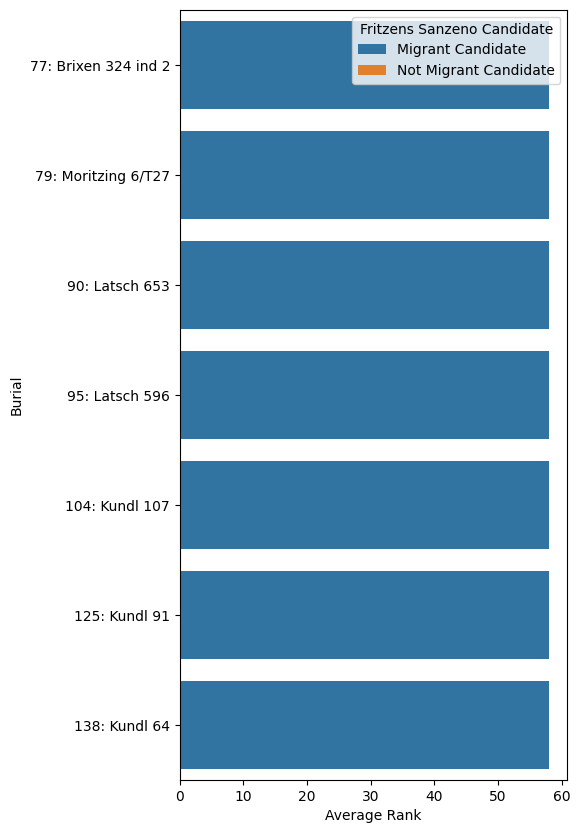

In [18]:
# Take a look at 1-3 isotope dataset prediction
from joblib import load
import seaborn as sns
import numpy as np
import pandas as pd
models = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/models/best_models_reduced_dataset.pkl')
result = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_datasetKernel: rbf C: 100 Gamma: scale.pkl')
result = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/reduced_dataset.pkl')
cols = result.columns

"""
# For best 10
# 1-2
# Create Plot based on average Rank with new logarithmic grid
m1 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 4.641588833612782 Gamma: 0.25353644939701164.pkl")
m2 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 6.135907273413176 Gamma: 0.25353644939701164.pkl")
m3 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 86974900.26177834 Gamma: 0.006734150657750828.pkl")
m4 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 114975699.53977357 Gamma: 0.006734150657750828.pkl")
m5 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 151991108.2952933 Gamma: 0.006734150657750828.pkl")
m6 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 200923300.2565046 Gamma: 0.006734150657750828.pkl")
m7 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 265608778.2946684 Gamma: 0.006734150657750828.pkl")
m8 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 351119173.4215127 Gamma: 0.006734150657750828.pkl")
m9 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 464158883.36127913 Gamma: 0.006734150657750828.pkl")
m10 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-2Kernel: rbf C: 811130830.789689 Gamma: 0.006734150657750828.pkl")

m1["rank1"] = m1["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank2"] = m2["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank3"] = m3["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank4"] = m4["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank5"] = m5["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank6"] = m6["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank7"] = m7["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank8"] = m8["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank9"] = m9["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank10"] = m10["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["Average Rank"] = m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6", "rank7", "rank8", "rank9", "rank10"]].mean(axis=1)
m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6", "rank7", "rank8", "rank9", "rank10", "Average Rank"]]
print(m1["Average Rank"])
"""
"""
# 1-3
# For best 2 per kernel
# Best 2 per Kernel reduced dataset
m1 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: linear C: 8697.490026177835 Gamma: nan.pkl')
m2 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: linear C: 5336699.231206302 Gamma: nan.pkl')
m3 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: poly C: 4832.930238571752 Gamma: 10000.0.pkl')
m4 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: poly C: 88586.67904100814 Gamma: 18.329807108324374.pkl')
m5 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: rbf C: 1321941.1484660287 Gamma: 6.4280731172843194e-06.pkl')
m6 = load('/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_1-3_best_2_per_kernelKernel: rbf C: 12328467.394420683 Gamma: 0.18738174228603868.pkl')

m1["rank1"] = m1["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank2"] = m2["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank3"] = m3["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank4"] = m4["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank5"] = m5["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank6"] = m6["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["Average Rank"] = m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6"]].mean(axis=1)
"""

# 2-3
m1 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: rbf C: 16297508.346206468 Gamma: 0.0008111308307896889.pkl")
m2 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: rbf C: 7054802.31071866 Gamma: 0.0004430621457583887.pkl")
m3 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: rbf C: 4037017.2585965497 Gamma: 0.00032745491628777317.pkl")
m4 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: rbf C: 3053855.5088334125 Gamma: 0.00032745491628777317.pkl")
m5 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: rbf C: 1747528.4000076829 Gamma: 0.0010974987654930567.pkl")
m6 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: rbf C: 1747528.4000076829 Gamma: 0.0005994842503189421.pkl")
m7 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: rbf C: 1000000.0 Gamma: 0.0010974987654930567.pkl")
m8 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: linear C: 6579.332246575683 Gamma: nan.pkl")
m9 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: linear C: 4977.023564332114 Gamma: nan.pkl")
m10 = load("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/predictions/full_dataset_2-3Kernel: linear C: 3764.9358067924713 Gamma: nan.pkl")

m1["rank1"] = m1["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank2"] = m2["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank3"] = m3["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank4"] = m4["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank5"] = m5["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank6"] = m6["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank7"] = m7["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank8"] = m8["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank9"] = m9["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["rank10"] = m10["Earliest positive Prediction at Multiplier"].rank(method='min', ascending=False)
m1["Average Rank"] = m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6", "rank7", "rank8", "rank9", "rank10"]].mean(axis=1)
m1[["rank1", "rank2", "rank3", "rank4", "rank5", "rank6", "rank7", "rank8", "rank9", "rank10", "Average Rank"]]
print(m1["Average Rank"])


# Create barplot of ranks
plot_data = m1.sort_values(by=["Average Rank"], ascending=True).reset_index(drop=True)
#print(plot_data[["Burial","rank1", "rank2", "rank3", "rank4", "rank5", "rank6", "rank7", "rank8", "rank9", "rank10", "Average Rank"]].head(10))
print(plot_data[["burial ID/processing number", "Average Rank"]])#.head(20))
plot_data = plot_data.reset_index()
plot_data['index'] = plot_data['index'] + 1
plot_data['index'] = plot_data['index'].astype(str)
plot_data['Burial_unique'] = plot_data['index'] + ": " + plot_data['site name'] + " " + plot_data['burial ID/processing number']
selection = pd.read_csv("/home/jan/CAU/Masterarbeit/master-thesis-jan-bensien/Code/isotope_prediction/datasets/Datenbanktabelle_cleaned.csv")
selection['Burial and Burial ID'] = selection['site name'] + selection['burial ID/processing number']
plot_data['Burial and Burial ID'] = plot_data['site name'] + plot_data['burial ID/processing number']
cols = ["87Sr/86Sr", "208Pb/204Pb", "207Pb/204Pb", "206Pb/204Pb", "208Pb/207Pb", "206Pb/207Pb"]
plot_data = plot_data.merge(selection[['Burial and Burial ID', 'Fritzens Sanzeno Candidate']], how='left', on=['Burial and Burial ID'])
plot_data[plot_data['site name'] == 'Pfatten']
max_rank = plot_data['Average Rank'].max()
unpredicted = plot_data[(plot_data['Average Rank'] == max_rank)] 
plot_data = plot_data[plot_data['Average Rank'] != max_rank] # Entferne alle mit max Rank - diese wurden nie als Migrant Candidate erkannt
found = plot_data = plot_data[(plot_data['Fritzens Sanzeno Candidate']) == 1]
missed = plot_data = unpredicted[(unpredicted['Fritzens Sanzeno Candidate']) == 1]
plot_data = plot_data[(plot_data['Fritzens Sanzeno Candidate']) != 0] # Entferne alle aus dem neuen Datensatz

replacement_map = {
    0: "No Information",
    1: "Migrant Candidate",
    2: "Not Migrant Candidate"
}

plot_data['Fritzens Sanzeno Candidate'] = plot_data['Fritzens Sanzeno Candidate'].map(replacement_map)

plt.figure(figsize=(5,10))
# For 2-3 head(58)
# for 1-2 head(160)
ax = sns.barplot(plot_data, y='Burial_unique', x="Average Rank", hue='Fritzens Sanzeno Candidate', dodge=False, errorbar=None, hue_order=["Migrant Candidate","Not Migrant Candidate"])#  order=plot_data.index,
# hue = ob es vorher identifiziert wurde
#sns.move_legend(ax, "upper right")
#ax.legend(fontsize=20)


order = ["No Information","Migrant Candidate","Not Migrant Candidate"]
#ax.set_xticklabels(plot_data["Average Rank"])
ax.set_ylabel("Burial")
#L = plt.legend(fontsize='x-large', title_fontsize='x-large')
#plt.xlabel("Average Rank", fontsize=20)
#plt.ylabel("Burial", fontsize=20)
#k160 = plot_data[plot_data['burial ID/processing number'] == '160']
#k40 = plot_data[plot_data['burial ID/processing number'] == '40']
#k89I = plot_data[plot_data['burial ID/processing number'] == '89/I']
